<a href="https://colab.research.google.com/github/batuhanyndny/intro/blob/master/error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip3 install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl torchvision

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

In [38]:
device = torch.device("cuda:0" if False else "cpu")
print(device)

cpu


In [39]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)

devtestset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [0]:
batch_size = 16
test_split = .3
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
tevtestset_size = len(devtestset)
indices = list(range(tevtestset_size))
split = int(np.floor(test_split * tevtestset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
dev_indices, test_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
dev_sampler = SubsetRandomSampler(dev_indices)
test_sampler = SubsetRandomSampler(test_indices)

devloader = torch.utils.data.DataLoader(devtestset, batch_size=batch_size, 
                                           sampler=dev_sampler)
testloader = torch.utils.data.DataLoader(devtestset, batch_size=batch_size,
                                                sampler=test_sampler)

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f131c8755c0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  Fil

 ship  bird  bird truck   car horse   cat   cat  bird plane   car horse   dog plane  frog  deer


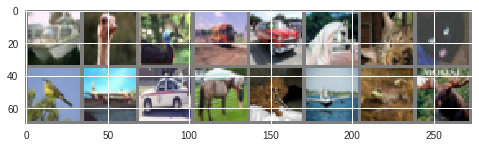

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))

In [42]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3) # channels filters 5x5 filter
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 grid 
        self.conv2 = nn.Conv2d(6, 16, 3) # filters 6 filters at top , 16 filters , grid 5 
        self.conv3= nn.Conv2d(16,18,3)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.1)
        self.fc1 = nn.Linear(18*2*2,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32,10)
        self.fc5 = nn.Linear(10,5)
        self.fc6 = nn.Linear(5,4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1,72)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout1(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.dropout2(x)
        x = F.relu(self.fc5(x))
        x=self.fc6(x)
        return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 18, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.2)
  (dropout2): Dropout(p=0.1)
  (fc1): Linear(in_features=72, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=5, bias=True)
  (fc6): Linear(in_features=5, out_features=4, bias=True)
)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [47]:
num_epochs = 10

# Used for tracking loss and plotting later
train_losses2 = []
dev_losses2 = []

print('Training...')
for epoch in range(num_epochs):  # loop over the dataset multiple times
    print('Epoch', epoch)
    train_loss = 0.0   
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # Send the inputs to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # track loss for printing
        train_loss += loss.item()
       
    # print average dev loss
    avg_train_loss = train_loss/len(trainloader)
    print('  average train mini-batch loss: {:.6f}'.format(avg_train_loss))
    train_losses2.append(avg_train_loss)

    # Calculate dev loss after every epoch
    with torch.no_grad():
        dev_loss = 0.0
        for data in devloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            dev_loss += loss.item()
        avg_dev_loss = dev_loss/len(devloader)
        print('  average dev mini-batch loss: {:.6f}'.format(avg_dev_loss))
        dev_losses2.append(avg_dev_loss)
            
    # Save the model so we can restore later
    print('  saving model checkpoint')
    # See https://pytorch.org/tutorials/beginner/saving_loading_models.html
    torch.save(net.state_dict(), 'net_checkpoint_{}.pth'.format(epoch))

print('Finished Training')

Training...
Epoch 0


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f1316750cf8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  Fil

RuntimeError: ignored